In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


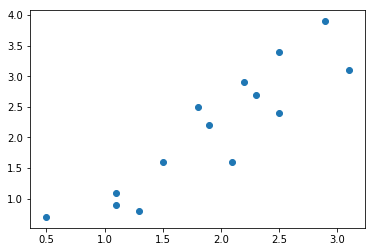

In [29]:
x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2.1,1.1,1.5,1.1,1.3,2.9,1.8,2.5])
y=np.array([2.4,0.7,2.9,2.2,3.1,2.7,1.6,1.1,1.6,0.9,0.8,3.9,2.5,3.4])
#print(data)
plt.scatter(x,y)

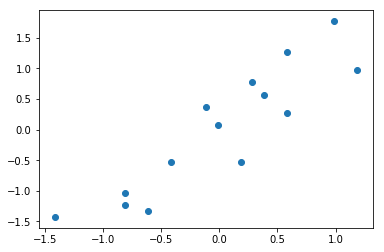

In [30]:
scale_x = x - np.mean(x)
scale_y = y - np.mean(y)
data = np.matrix([[scale_x[i],scale_y[i]] for i in range(len(scale_x))])
plt.scatter(scale_x,scale_y)

In [31]:
print(data)

[[ 0.58571429  0.27142857]
 [-1.41428571 -1.42857143]
 [ 0.28571429  0.77142857]
 [-0.01428571  0.07142857]
 [ 1.18571429  0.97142857]
 [ 0.38571429  0.57142857]
 [ 0.18571429 -0.52857143]
 [-0.81428571 -1.02857143]
 [-0.41428571 -0.52857143]
 [-0.81428571 -1.22857143]
 [-0.61428571 -1.32857143]
 [ 0.98571429  1.77142857]
 [-0.11428571  0.37142857]
 [ 0.58571429  1.27142857]]


In [32]:
Cov = np.cov(scale_x,scale_y) # 计算协方差矩阵
#print(Cov)

In [33]:
eig_val,eig_etc = np.linalg.eig(Cov)
print(eig_val,end="\n\n")
print("分割线".center(50,"="),end="\n\n")
print(eig_etc)

[0.0708179  1.54346781]

=======================分割线========================

[[-0.81921009 -0.57349353]
 [ 0.57349353 -0.81921009]]


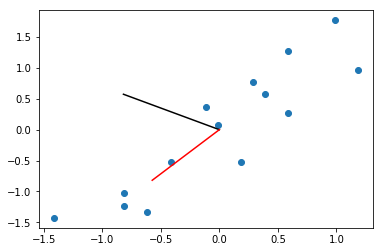

In [40]:
plt.plot(scale_x,scale_y,'o')
plt.plot([eig_etc[0][0],0],[eig_etc[1][0],0],color = 'black')
plt.plot([eig_etc[0][1],0],[eig_etc[1][1],0],color = 'red')

In [41]:
new_data = np.transpose(np.dot(eig_etc,np.transpose(data)))
print(new_data)
print(eig_etc)

[[-0.63548558  0.11354633]
 [ 1.9778736   0.35921643]
 [-0.67646932 -0.46810678]
 [-0.02926082 -0.06670777]
 [-1.52845711 -0.11580462]
 [-0.64369162 -0.24691541]
 [ 0.15099327  0.53951699]
 [ 1.25695013  0.37562851]
 [ 0.64251933  0.19542087]
 [ 1.37164884  0.53947053]
 [ 1.26515617  0.73609024]
 [-1.82340991 -0.8858714 ]
 [-0.11938787 -0.36982015]
 [-1.20897911 -0.70566377]]
[[-0.81921009 -0.57349353]
 [ 0.57349353 -0.81921009]]


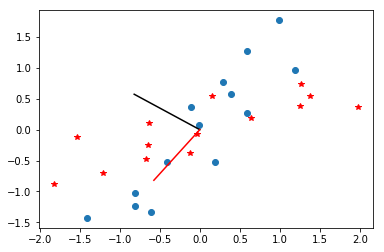

In [42]:
plt.plot(scale_x,scale_y,'o')
plt.plot([eig_etc[0][0],0],[eig_etc[1][0],0],color = 'black')
plt.plot([eig_etc[0][1],0],[eig_etc[1][1],0],color = 'red')
plt.plot(new_data[:,0],new_data[:,1],'*',color = 'red') # 红色为重建的

In [43]:
new_data

matrix([[-0.63548558,  0.11354633],
        [ 1.9778736 ,  0.35921643],
        [-0.67646932, -0.46810678],
        [-0.02926082, -0.06670777],
        [-1.52845711, -0.11580462],
        [-0.64369162, -0.24691541],
        [ 0.15099327,  0.53951699],
        [ 1.25695013,  0.37562851],
        [ 0.64251933,  0.19542087],
        [ 1.37164884,  0.53947053],
        [ 1.26515617,  0.73609024],
        [-1.82340991, -0.8858714 ],
        [-0.11938787, -0.36982015],
        [-1.20897911, -0.70566377]])

In [44]:
eig_pairs = [(np.abs(eig_val[i]),eig_etc[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)
eig_pairs

[(1.5434678094938252, array([-0.57349353, -0.81921009])),
 (0.07081790479188932, array([-0.81921009,  0.57349353]))]

In [45]:
features = eig_pairs[0][1]
features

array([-0.57349353, -0.81921009])

In [46]:
now_data = np.transpose(np.dot(features,np.transpose(data)))
now_data

matrix([[-0.55826038],
        [ 1.98138383],
        [-0.79581736],
        [-0.05032224],
        [-1.47580356],
        [-0.6893247 ],
        [ 0.32650511],
        [ 1.30960368],
        [ 0.67060122],
        [ 1.4734457 ],
        [ 1.440668  ],
        [-2.01647293],
        [-0.23873592],
        [-1.37747047]])

In [47]:
now_data

matrix([[-0.55826038],
        [ 1.98138383],
        [-0.79581736],
        [-0.05032224],
        [-1.47580356],
        [-0.6893247 ],
        [ 0.32650511],
        [ 1.30960368],
        [ 0.67060122],
        [ 1.4734457 ],
        [ 1.440668  ],
        [-2.01647293],
        [-0.23873592],
        [-1.37747047]])

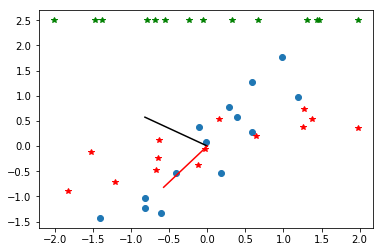

In [49]:
plt.plot(scale_x,scale_y,'o')
plt.plot([eig_etc[0][0],0],[eig_etc[1][0],0],color = 'black')
plt.plot([eig_etc[0][1],0],[eig_etc[1][1],0],color = 'red')
plt.plot(new_data[:,0],new_data[:,1],'*',color = 'red')
plt.plot(now_data[:,0],[2.5]*len(scale_x),'*',color = 'green')  # 绿色为降维的数据